In [53]:
import pandas as pd
import pandas.tseries
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [54]:
X = pd.read_csv('data/train.csv')
X.head()

,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,2020/01/01,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,2020/01/01,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,2020/01/01,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,2020/01/01,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,2020/01/01,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [55]:
X['Date'] = pd.to_datetime(X['DATE (YYYY/MM/DD)'] +" "+ X['MST'])


In [56]:
X.drop(['DATE (YYYY/MM/DD)','MST'], axis=1, inplace=True)

In [57]:
X['Date'] = pd.to_datetime(X['Date'], format='%Y/%m/%d %H:%M')

In [58]:
X.set_index('Date', inplace=True)

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527040 entries, 2020-01-01 00:00:00 to 2020-12-31 23:59:00
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Global CMP22 (vent/cor) [W/m^2]        527040 non-null  float64
 1   Direct sNIP [W/m^2]                    527040 non-null  float64
 2   Azimuth Angle [degrees]                527040 non-null  float64
 3   Tower Dry Bulb Temp [deg C]            527040 non-null  float64
 4   Tower Wet Bulb Temp [deg C]            527040 non-null  float64
 5   Tower Dew Point Temp [deg C]           527040 non-null  float64
 6   Tower RH [%]                           527040 non-null  float64
 7   Total Cloud Cover [%]                  527040 non-null  int64  
 8   Peak Wind Speed @ 6ft [m/s]            527040 non-null  float64
 9   Avg Wind Direction @ 6ft [deg from N]  527040 non-null  float64
 10  Station Pressure [mBar

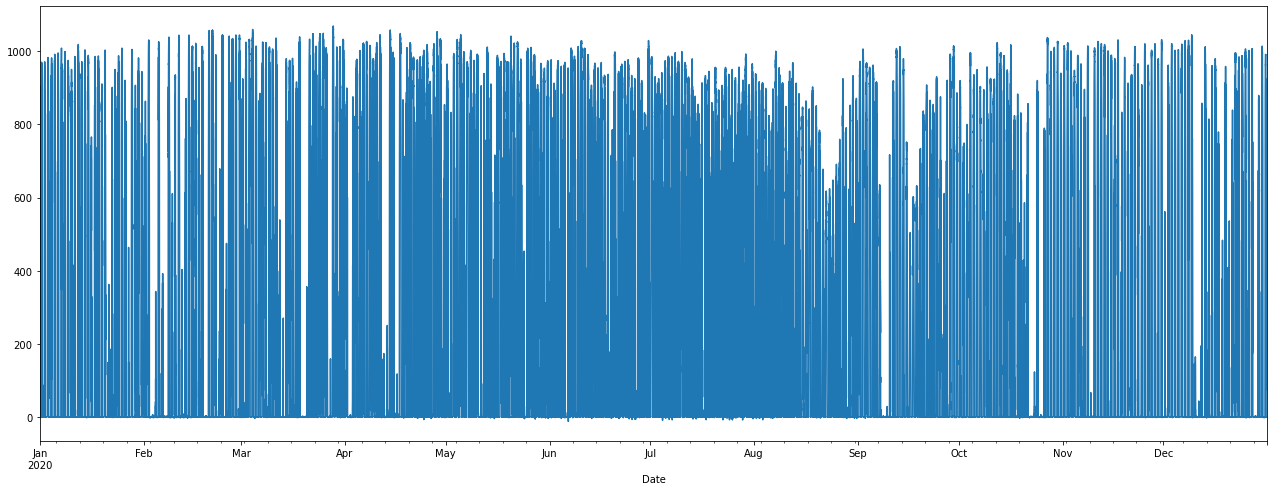

In [47]:
X['Direct sNIP [W/m^2]'].plot(figsize=(22,8))
plt.show()

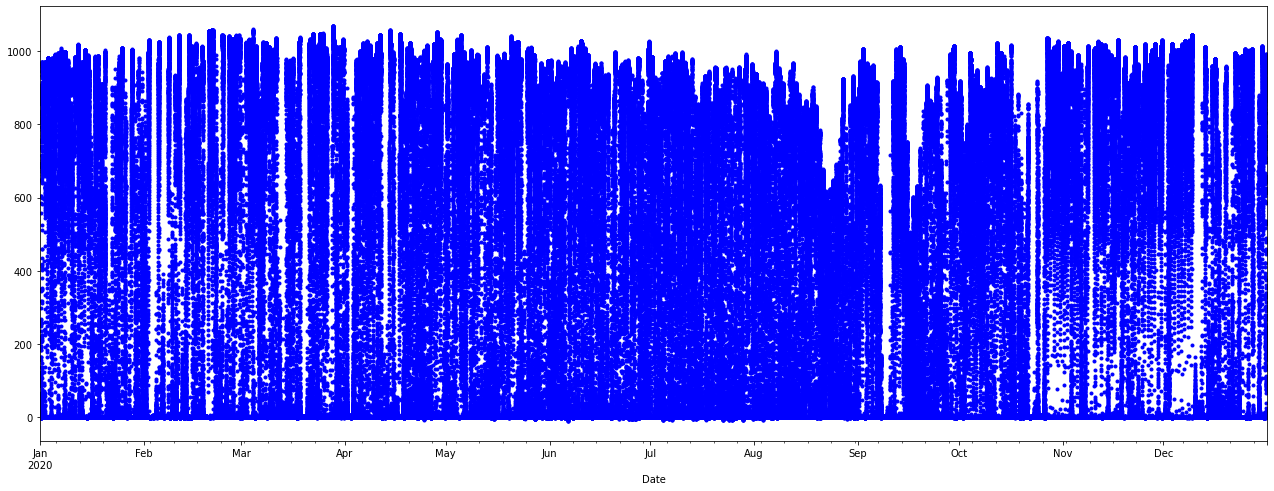

In [61]:
X['Direct sNIP [W/m^2]'].plot(figsize=(22,8), style='b.')
plt.show()

In [65]:
#groupby year
month_groups=X['Direct sNIP [W/m^2]'].groupby(pd.Grouper(freq='M'))

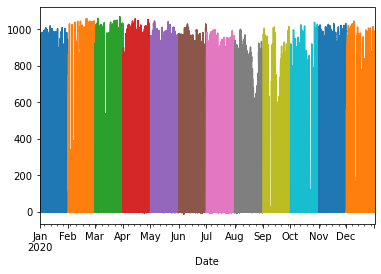

In [66]:
month_groups.plot();

In [74]:
temp_monthly=pd.DataFrame() 


In [75]:
for mnth, group in month_groups:
    temp_monthly[mnth.month] = group.values.ravel()

ValueError: Length of values (41760) does not match length of index (44640)

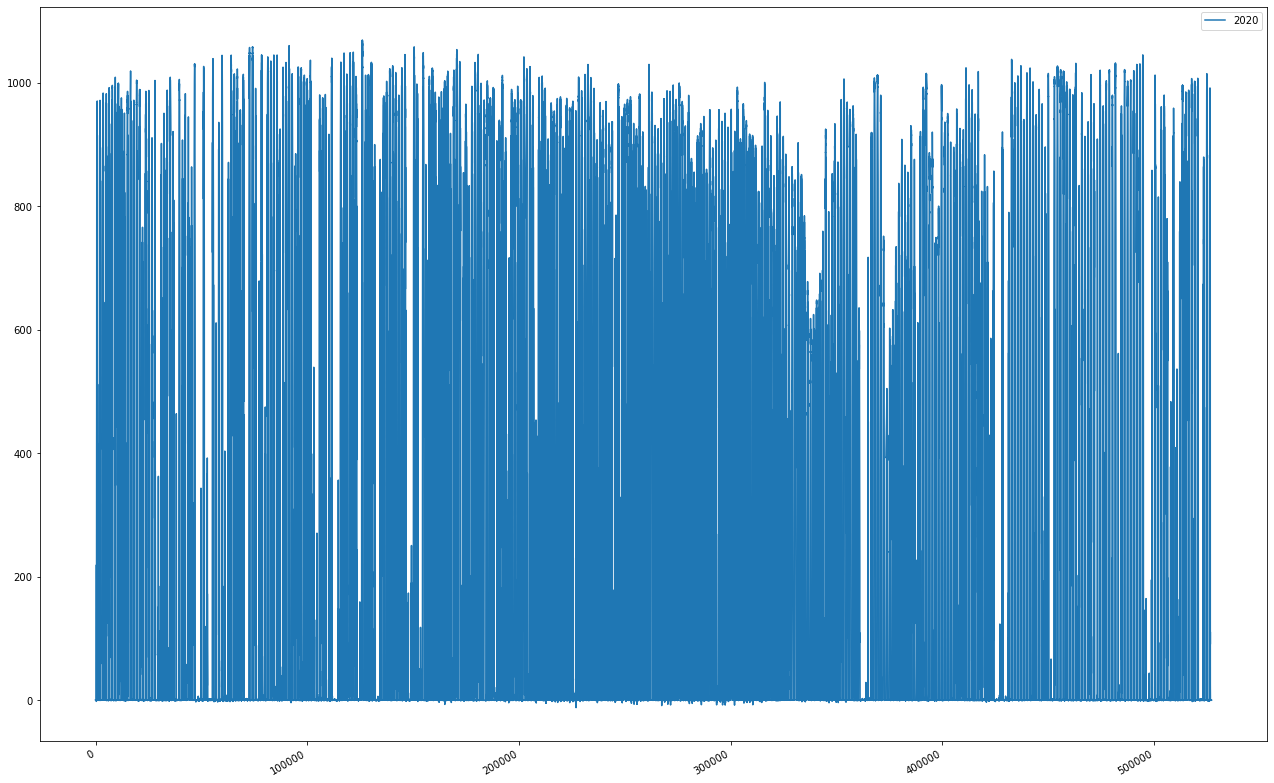

In [ ]:
temp_monthly.plot(figsize=(22,15), subplots=True, legend=True)
plt.show()


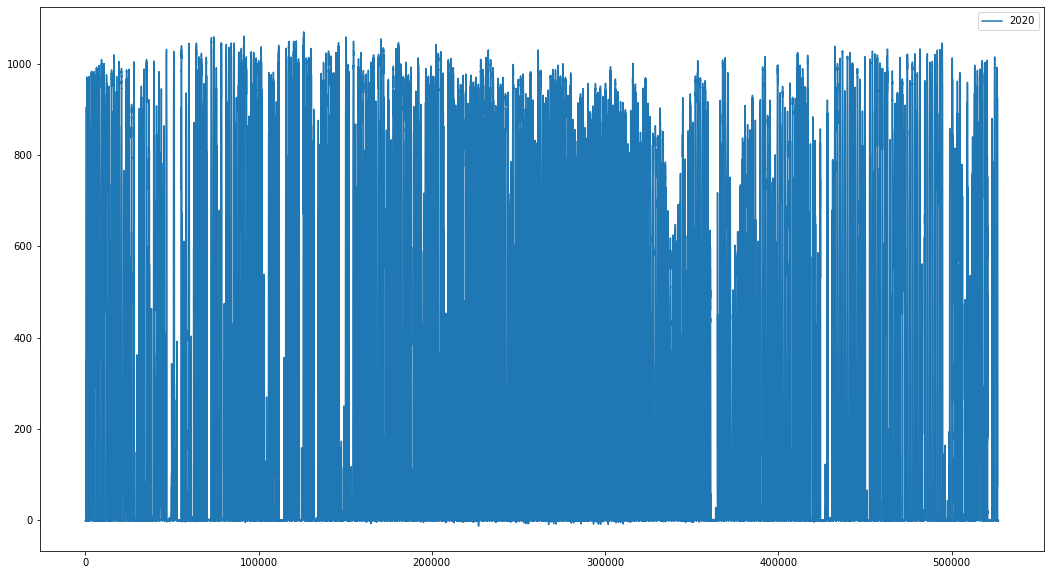

In [ ]:
temp_monthly.plot(figsize=(18,10), subplots=False, legend=True)
plt.show()


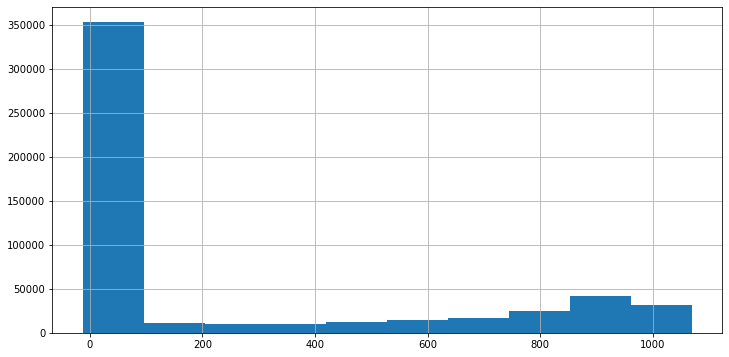

In [68]:
X['Direct sNIP [W/m^2]'].hist(figsize=(12,6))
plt.show()

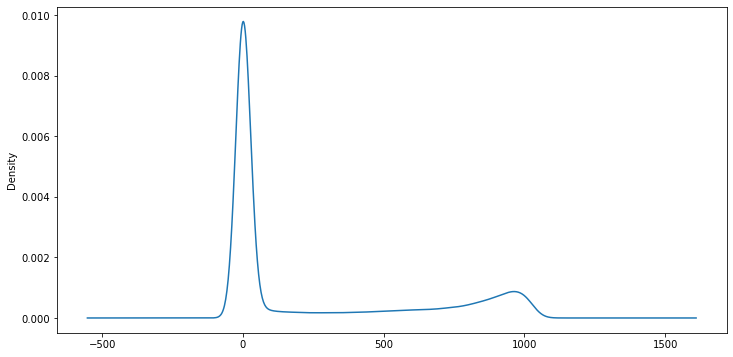

In [69]:
X['Direct sNIP [W/m^2]'].plot(kind='kde', figsize=(12,6))
plt.show()

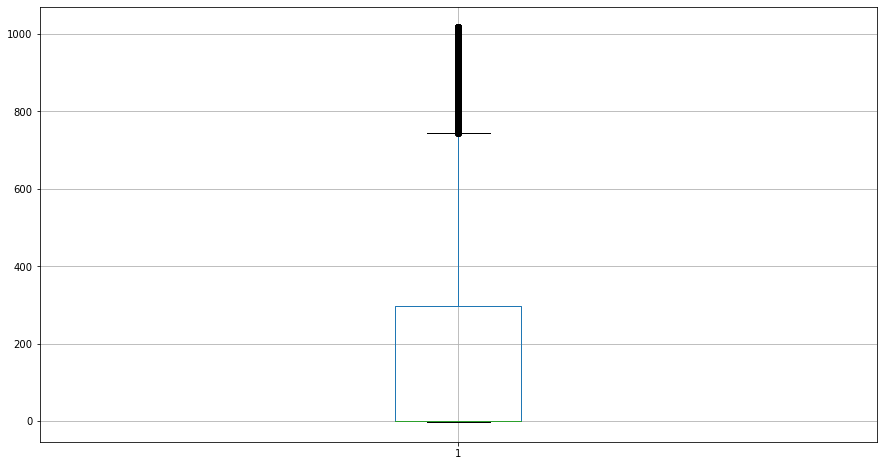

In [70]:
temp_monthly.boxplot(figsize=(15,8))
plt.show()

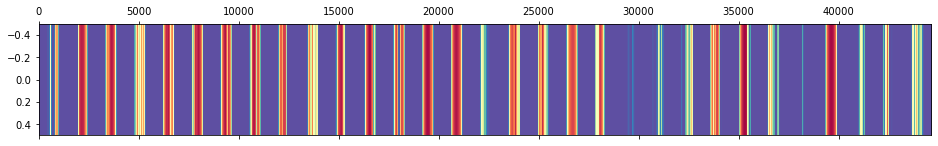

In [72]:
month_matrix=temp_monthly.T
# Draw a heatmap with matshow()
plt.matshow( month_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()
